<a href="https://colab.research.google.com/github/takaito1/EAS4821_S2024/blob/main/scripts/Week12_ocean_P_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Week12 exercise: Ocean P cycling

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as linalg # linear algebra

### 1. set parameters

In [2]:
VL = 3e16
VH = 1.6e16
VD = 1.4e18
C = 6e7
M = 8e7
lda = 3.2e-8
# These are in SI units (mol, m, sec, ...)

In [3]:
# parameter normalized by volume
cL = C/VL
cH = C/VH
cD = C/VD
mH = M/VH
mD = M/VD

In [4]:
# assemble the T matrix
T = np.array([[-(cL+lda), 0, cL],
            [cH, -(cH+mH+lda), mH],
            [lda*VL/VD, cD+mD+lda*VH/VD, -(cD+mD)]
           ])
T

array([[-3.40000000e-08,  0.00000000e+00,  2.00000000e-09],
       [ 3.75000000e-09, -4.07500000e-08,  5.00000000e-09],
       [ 6.85714286e-10,  4.65714286e-10, -1.00000000e-10]])

In [42]:
# time axis : dt = 1 month
dt = 60*60*24*30
time = np.arange(0,120,1) # in years: 10 year time series
N=np.size(time)
P=np.zeros((3,N))
Pef=np.zeros((3,N)) # Euler Forward
Peb=np.zeros((3,N)) # Euler Backward

# initialize P array for matrix exponential
P0=np.array([2,2,2])
P[:,0] = P0 # mmolP/m3
Pef[:,0] = P0 # mmolP/m3
Peb[:,0] = P0 # mmolP/m3

### 2. Analytical solution: matrix exponential

In [43]:
#optional step: eigen values and eigen vectors
#
[w,v]=linalg.eig(T)
print('Eigen values are: ')
print(w)

print('Eigen vectors are: ')
print(v)

a=v[:,2]
np.sqrt(a@a.T)

Eigen values are: 
[-4.07948108e-08+0.j -3.40551892e-08+0.j -7.76236382e-25+0.j]
Eigen vectors are: 
[[-0.00338502 -0.87982019  0.0582476 ]
 [-0.99992814 -0.47468621  0.12685827]
 [ 0.01150029  0.02427828  0.99020917]]


1.0

In [44]:
# analytical solution using matrix exponential
for n in range(1,N):
    P[:,n]=linalg.expm(T*time[n]*dt)@P[:,0]

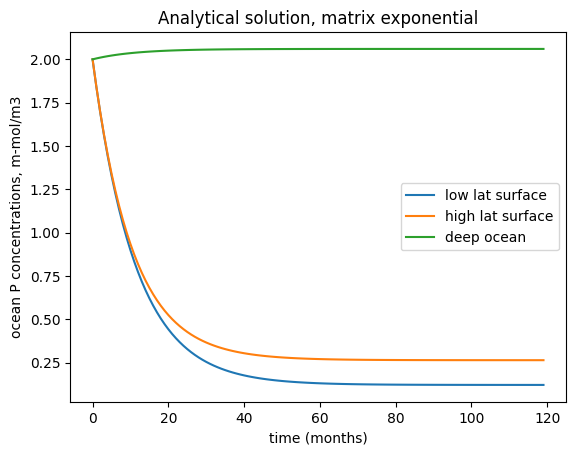

In [45]:
# visualization
fig=plt.figure()
plt.plot(P.T)
plt.xlabel('time (months)')
plt.ylabel('ocean P concentrations, m-mol/m3')
plt.legend(['low lat surface','high lat surface','deep ocean'])
plt.title('Analytical solution, matrix exponential')
plt.show()


### 3. Numerical solution: Euler forward

In [47]:
# numerical solution Euler forward
for n in range(1,N):
    Pef[:,n]=(np.eye(3)+dt*T)@Pef[:,n-1]

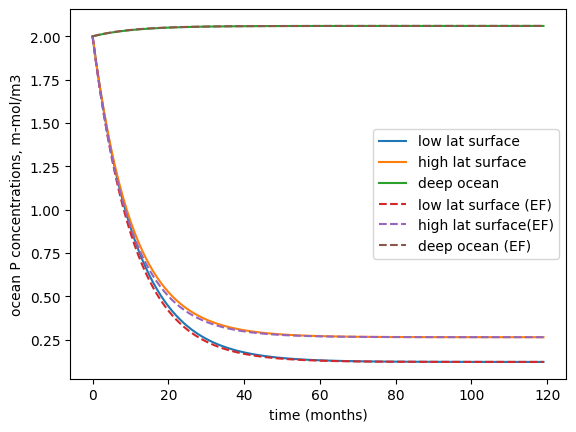

In [48]:
# visualization
fig=plt.figure()
plt.plot(P.T)
plt.plot(Pef.T,'--')
plt.xlabel('time (months)')
plt.ylabel('ocean P concentrations, m-mol/m3')
plt.legend(['low lat surface','high lat surface','deep ocean',
            'low lat surface (EF)','high lat surface(EF)','deep ocean (EF)'])
plt.show()

## 4. Numerical solution: Euler backward

In [49]:
# numerical solution Euler backward
for n in range(1,N):
    Peb[:,n]=linalg.inv(np.eye(3)-dt*T)@Peb[:,n-1]

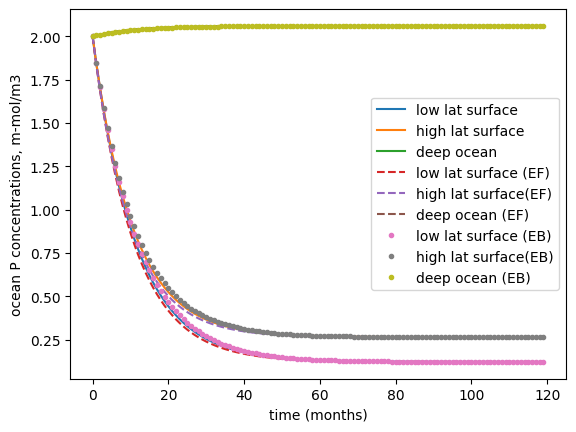

In [50]:
# visualization
fig=plt.figure()
plt.plot(P.T)
plt.plot(Pef.T,'--')
plt.plot(Peb.T,'.')
plt.xlabel('time (months)')
plt.ylabel('ocean P concentrations, m-mol/m3')
plt.legend(['low lat surface','high lat surface','deep ocean',
            'low lat surface (EF)','high lat surface(EF)','deep ocean (EF)',
           'low lat surface (EB)','high lat surface(EB)','deep ocean (EB)'])

plt.show()

## 5. Steady states


In [51]:
# P_bar

P_bar=[VL, VH, VD]@P0

# s matrix
s=[0,0,P_bar]

# assemble the U matrix
U = np.array([[-(cL+lda), 0, cL],
            [cH, -(cH+mH+lda), mH],
            [VL, VH, VD]
           ])


In [52]:
P_ss=linalg.inv(U)@s
P_ss

array([0.12118243, 0.26392491, 2.06010123])

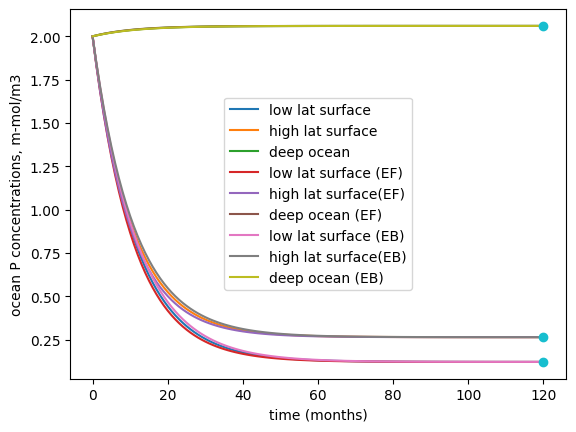

In [53]:
# visualization
fig=plt.figure()
plt.plot(P.T)
plt.plot(Pef.T)
plt.plot(Peb.T)

plt.plot([120,120,120],P_ss,'o')

plt.xlabel('time (months)')
plt.ylabel('ocean P concentrations, m-mol/m3')


plt.legend(['low lat surface','high lat surface','deep ocean',
            'low lat surface (EF)','high lat surface(EF)','deep ocean (EF)',
           'low lat surface (EB)','high lat surface(EB)','deep ocean (EB)'])

plt.show()